# KNN for Classification

In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
data = pd.read_csv(r'C:\Users\mukes\Downloads\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
X = data.drop('Outcome', axis = 1).values
y = data['Outcome'].values

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 0, stratify=y)

In [8]:
scaler.fit_transform(X_train)

array([[-3.20113222e-01, -5.77824074e-01, -1.37706081e+00, ...,
        -1.58122940e-01, -2.17805644e-01, -6.58705458e-01],
       [-1.20010575e+00, -4.51605989e-02, -3.72257210e+00, ...,
         5.22503134e-02, -9.63948737e-01, -8.24010701e-01],
       [-3.20113222e-01,  1.92882757e+00,  2.22151440e-01, ...,
        -1.97567925e-01, -3.76253019e-01, -4.10747593e-01],
       ...,
       [-3.20113222e-01, -1.20448699e+00,  8.92314079e-03, ...,
        -1.43351079e+00, -2.49495119e-01, -7.41358079e-01],
       [ 1.73320267e+00, -1.70493181e-01,  1.50152124e+00, ...,
        -1.05220927e+00,  1.57409012e+00,  2.51551457e-03],
       [-2.67823812e-02,  8.00834332e-01,  4.35379740e-01, ...,
         8.54298342e-01,  1.27897719e-01,  2.73005202e+00]])

In [9]:
scaler.transform(X_test)

array([[ 2.61319519,  1.17683208,  2.35443444, ...,  1.35393482,
        -0.62976882,  0.82904173],
       [-0.61344406,  0.67550175,  0.64860804, ..., -0.96017097,
         0.82218531, -1.07196857],
       [-0.32011322,  1.64682926,  0.75522219, ...,  0.48614515,
        -0.62688796, -0.98931594],
       ...,
       [-0.90677491, -1.29848642,  0.54199389, ..., -0.86813267,
         0.30939198, -0.98931594],
       [-0.90677491, -1.17315384, -0.09769101, ..., -1.81481231,
         0.4275073 , -0.57605284],
       [-1.20010575, -0.0451606 , -0.31091931, ...,  0.38095852,
         0.7184743 , -0.90666332]])

Building Model : KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
neighbhors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbhors))
test_accuracy = np.empty(len(neighbhors))

for i, k, in enumerate(neighbhors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

Plotting accuracy vs Number of neigbhors

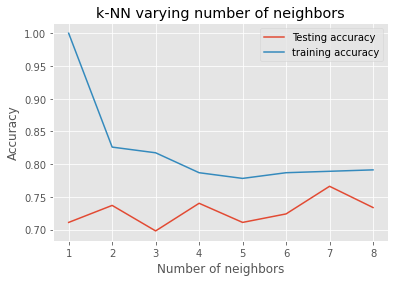

In [11]:
plt.title('k-NN varying number of neighbors')
plt.plot(neighbhors, test_accuracy, label = 'Testing accuracy')
plt.plot(neighbhors, train_accuracy, label = 'training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

So k = 7 gives highest test accuracy, so we are going to choose k = 7

In [12]:
knn = KNeighborsClassifier(n_neighbors=7)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [15]:
pred = knn.predict(X_test)

In [16]:
accuracy_score(y_test, pred)

0.7662337662337663

Calculating confusion matrix

In [17]:
confusion_matrix(y_test, pred)

array([[173,  28],
       [ 44,  63]], dtype=int64)

Plotting confusion matrix

c:\Users\mukes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

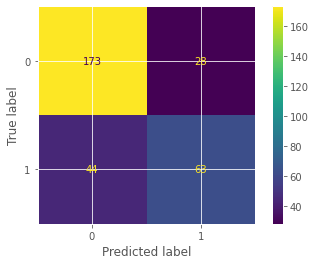

In [18]:
plot_confusion_matrix(knn, X_test, y_test)
plt.plot

Classification report

In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       201
           1       0.69      0.59      0.64       107

    accuracy                           0.77       308
   macro avg       0.74      0.72      0.73       308
weighted avg       0.76      0.77      0.76       308



In [20]:
pred_prob = knn.predict_proba(X_test)[:, 1]
pred_prob[0:5], pred_prob.ndim #showing only 1st 5 numbers and its dimension

(array([0.71428571, 0.14285714, 0.71428571, 0.42857143, 0.14285714]), 1)

In [21]:
from sklearn.metrics import roc_curve

Calculating FPR, TPR, Thresholds

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
print('fpr: \n', fpr[:5], '\n')
print('tpr: \n', tpr[:5], '\n')
print('thresholds: \n', thresholds[:5])

fpr: 
 [0.         0.00497512 0.04975124 0.08457711 0.13930348] 

tpr: 
 [0.         0.02803738 0.1682243  0.34579439 0.58878505] 

thresholds: 
 [2.         1.         0.85714286 0.71428571 0.57142857]


Plotting ROC Curve

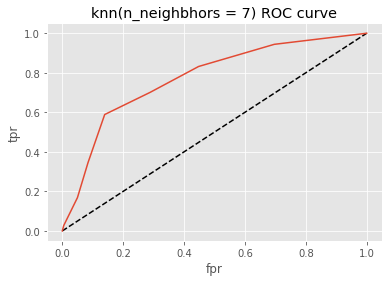

In [23]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('knn(n_neighbhors = 7) ROC curve')
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_prob)

0.7730738829218393

In [25]:
from sklearn.model_selection import GridSearchCV

cross validation using GridSearch CV

In [26]:
param_grid = {'n_neighbors' : np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [27]:
knn_cv.best_score_

0.7578558696205755

In [28]:
knn_cv.best_params_

{'n_neighbors': 14}

In [29]:
from sklearn.model_selection import KFold, cross_val_score

cross validation using KFold

In [30]:
kf = KFold(n_splits=10, random_state=41, shuffle=True)
model = KNeighborsClassifier(n_neighbors=7)
result = cross_val_score(model, X, y, cv = kf)

In [31]:
result.mean()

0.7226930963773068